<h1 style="color: #f73779	;"> ChapterCraft: Insights Beyond Pages 📖 </h1>

<h1 style="color: #F08080	;">01. Libraries </h1>

In [3]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np
import warnings # nobody likes warnings
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# 🤖 Machine Learning
from sklearn.utils import resample
from sklearn.datasets import fetch_california_housing #sklearn tiene muchos csv esta funcion me los trae y no descargo y guardo el csv como tal.
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor #prediccion peresoza.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression #esta es nueva
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay #esta es nueva, me da el mapita de calor de roc curve
from sklearn.metrics import classification_report #esta es nueva, esta me va a decir todo el reporte
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

#nltk.download('stopwords')
#nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\astri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\astri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\astri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h1 style="color: #F08080;">02. Data Extraction </h1>

In [5]:
df_books = pd.read_csv('df_books.csv')
df_books.head(4)

,TITLE,AUTHOR,GENRE1,GENRE2,GENRE3,FORMAT,PAGES,DESCRIPTION,PUBLISHED,PUBLISHED_YEAR,STARS,RATINGS
0,The Complete Stories and Poems,Edgar Allan Poe,Poetry,Horror,Fiction,Hardcover,821.00,This single volume brings together all of Poe'...,"November 1, 1849",1849,4.40,280794
1,The Old Man and the Sea,Ernest Hemingway,Fiction,Literature,Novels,Hardcover,96.00,"This short novel, already a modern classic, is...","September 1, 1952",1952,3.80,1198272
2,Interview with the Vampire,Anne Rice,Fantasy,Fiction,Vampires,Paperback,346.00,"This is the story of Louis, as told in his own...","April 12, 1976",1976,4.02,609274
3,Don Quixote,Miguel de Cervantes Saavedra,Classics,Literature,Spanish Literature,Paperback,1023.00,Don Quixote has become so entranced by reading...,"January 1, 1605",1605,3.90,281892


<h1 style="color: #F08080;">03. Initial Exploration </h1>

In [7]:
df_books.columns = df_books.columns.str.lower().str.replace(" ", "_")

In [8]:
#We are going to change the number of the column genre1 to genre
df_books.rename(columns={'genre1': 'genre'}, inplace=True)


In [9]:
df_books.columns

Index(['title', 'author', 'genre', 'genre2', 'genre3', 'format', 'pages',
       'description', 'published', 'published_year', 'stars', 'ratings'],
      dtype='object')

In [10]:
df_ped = df_books[['title', 'genre', 'description']].copy()
df_ped.head(5)

,title,genre,description
0,The Complete Stories and Poems,Poetry,This single volume brings together all of Poe'...
1,The Old Man and the Sea,Fiction,"This short novel, already a modern classic, is..."
2,Interview with the Vampire,Fantasy,"This is the story of Louis, as told in his own..."
3,Don Quixote,Classics,Don Quixote has become so entranced by reading...
4,The Hunger Games,Fiction,In the ruins of a place once known as North Am...


<h1 style="color: #F08080;">04. Data Cleaning </h1>

In [12]:
#Duplicated data
df_ped.duplicated().sum()

0

In [13]:
#Nan values
df_ped.isna().sum()

title           1
genre           0
description    14
dtype: int64

In [14]:
len(df_ped)

9637

In [15]:
#We are going to erase the rows with null values because this is the target of our model. 
df_ped = df_ped.dropna(subset=["title", "description", "genre"])

In [16]:
len(df_ped)

9623

In [17]:
df_ped.isna().sum()

title          0
genre          0
description    0
dtype: int64

In [18]:
#Empty spaces
df_ped.eq(' ').sum()

title          0
genre          0
description    0
dtype: int64

<h2 style="color: #FFA07A;">Mapping Genders </h2>

In [20]:
df_ped.genre.value_counts()

genre
Fiction         2133
Young Adult      961
Classics         454
Nonfiction       420
Romance          417
                ... 
Kindle $8.49       1
Mathematics        1
Pulp               1
Asia               1
Kindle $2.99       1
Name: count, Length: 237, dtype: int64

In [21]:
df_ped.genre.unique()

array(['Poetry', 'Fiction', 'Fantasy', 'Classics', 'Historical Fiction',
       'Memoir', 'Young Adult', 'Science Fiction', 'Russia',
       'Picture Books', 'Mystery', 'Nonfiction', 'Contemporary',
       'Coming Of Age', 'Dystopia', 'Romance', 'Horror', 'Mythology',
       'Erotica', 'Thriller', 'Travel', 'Music', 'LGBT', 'Plays',
       'Vampires', 'Adventure', 'Mystery Thriller',
       'Psychological Thriller', 'Paranormal', 'Literary Fiction',
       'Middle Grade', 'Write a Review', 'Animals', 'Kindle $5.99',
       'Science Fiction Fantasy', 'Magical Realism', 'Philosophy',
       'Childrens', 'France', 'Humor', 'Novels', 'New Adult', 'Business',
       'Medical', 'Graphic Novels', 'Self Help', 'Dragons', 'Ireland',
       'Contemporary Romance', 'Artificial Intelligence', 'Crime',
       'Biography', 'Book details & editions', 'Russian Literature',
       'Epic', 'Sociology', 'Writing', 'China', 'Zombies',
       'Short Stories', 'Politics', 'Japan', 'Sports', 'Time Travel',
 

In [22]:
#Create a dictionary with genre1 that we have and the genders we want.
genre_mapping = {
    'Poetry': 'Literature',
    'Fiction': 'Fiction',
    'Fantasy': 'Fantasy',
    'Classics': 'Classics',
    'Historical Fiction': 'Fiction',
    'Memoir': 'Nonfiction',
    'Young Adult': 'Young Adult',
    'Science Fiction': 'Science Fiction',
    'Picture Books': 'Childrens',
    'Mystery': 'Mystery/Thriller',
    'Nonfiction': 'Nonfiction',
    'Contemporary': 'Fiction',
    'Coming Of Age': 'Fiction',
    'Dystopia': 'Science Fiction',
    'Romance': 'Romance',
    'Horror': 'Horror',
    'Mythology': 'Mythology',
    'Erotica': 'Romance',
    'Thriller': 'Mystery/Thriller',
    'Travel': 'Nonfiction',
    'Music': 'Nonfiction',
    'LGBT': 'Fiction',
    'Plays': 'Literature',
    'Adventure': 'Fiction',
    'Psychological Thriller': 'Mystery/Thriller',
    'Paranormal': 'Fantasy',
    'Literary Fiction': 'Fiction',
    'Childrens': 'Childrens',
    'Graphic Novels': 'Comics/Graphic Novels',
    'Self Help': 'Nonfiction',
    'Magical Realism': 'Fantasy',
    'Philosophy': 'Nonfiction',
    'Humor': 'Fiction',
    'New Adult': 'Young Adult',
    'Biography': 'Nonfiction',
    'Sociology': 'Nonfiction',
    'Writing': 'Nonfiction',
    'Zombies': 'Horror',
    'Politics': 'Nonfiction',
    'Sports': 'Nonfiction',
    'Time Travel': 'Science Fiction',
    'Psychology': 'Nonfiction',
    'Witches': 'Fantasy',
    'Action': 'Fiction',
    'Urban Fantasy': 'Fantasy',
    'Feminism': 'Nonfiction',
    'History': 'Nonfiction',
    'Space Opera': 'Science Fiction',
    'Education': 'Nonfiction',
    'Epic Fantasy': 'Fantasy',
    'Magic': 'Fantasy',
    'Paranormal Romance': 'Romance',
    'True Crime': 'Nonfiction',
    'Comedy': 'Fiction',
    'Gothic': 'Fiction',
    'High Fantasy': 'Fantasy',
    'Christian': 'Religion',
    'Christian Fiction': 'Religion',
    'Science': 'Nonfiction',
    'Nature': 'Nonfiction',
    'War': 'Historical',
    'Manga': 'Comics/Graphic Novels',
    'Inspirational': 'Nonfiction',
    'Chick Lit': 'Romance',
    'Teen': 'Young Adult',
    'Cooking': 'Nonfiction',
    'Economics': 'Nonfiction',
    'Military Fiction': 'Historical',
    'Westerns': 'Fiction',
    'Fan Fiction': 'Fiction',
    'Post Apocalyptic': 'Science Fiction',
    'Victorian': 'Classics',
    'Technology': 'Nonfiction',
    'Personal Development': 'Nonfiction',
}

#We apply our dictionary to our column 
df_ped['genre'] = df_ped['genre'].map(genre_mapping).fillna('Other')


In [23]:
df_ped.genre.value_counts()

genre
Fiction                  2990
Other                    1581
Young Adult              1057
Nonfiction               1036
Fantasy                   667
Mystery/Thriller          576
Romance                   501
Classics                  455
Science Fiction           295
Horror                    139
Childrens                 124
Literature                 67
Mythology                  48
Comics/Graphic Novels      41
Religion                   34
Historical                 12
Name: count, dtype: int64

<h2 style="color: #FFA07A;">Copy as best practices </h2>

In [25]:
df = df_ped.copy()

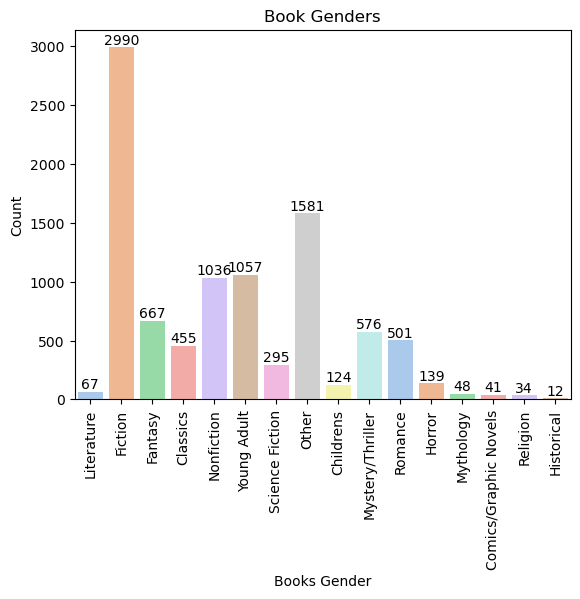

In [26]:
#We plotted our gender column to see the distribution
sns.countplot(
    x='genre',
    data=df,                       
    palette=sns.color_palette('pastel')
)
plt.ylabel('Count')
plt.xlabel('Books Gender')  
plt.title('Book Genders') 
plt.xticks(rotation=90)  

for bar in plt.gca().patches:  #Get the bars of the graphic
    height = bar.get_height()  #Height of every bar (count)
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,  #Horizontal position.
        height,              #Bar height
        f'{int(height)}',   #This convert the number into integer.                
        ha='center',    #This indicate that the text should be at the center of the column                      
        va='bottom' #This indicate that the text should go at the bottom of the column                      
    )

plt.show()

As we can see, there are some genders with few books. 
We are going to considere for our model just the genders with more than 80 books. 


In [28]:
genre_counts = df['genre'].value_counts()

# Get genres with counts over 80
selected_genres = genre_counts[genre_counts > 60].index.tolist()

# Filter the original DataFrame based on selected genres
prediction_df = df[df['genre'].isin(selected_genres)]

prediction_df

,title,genre,description
0,The Complete Stories and Poems,Literature,This single volume brings together all of Poe'...
1,The Old Man and the Sea,Fiction,"This short novel, already a modern classic, is..."
2,Interview with the Vampire,Fantasy,"This is the story of Louis, as told in his own..."
3,Don Quixote,Classics,Don Quixote has become so entranced by reading...
4,The Hunger Games,Fiction,In the ruins of a place once known as North Am...
...,...,...,...
9632,Promise of Blood,Fiction,The Age of Kings is dead . . . and I have kill...
9633,Death Be Not Proud,Classics,chronicles Johnny Gunther's gallant struggle ...
9634,It Happened One Autumn,Romance,Where beautiful but bold Lillian Bowman quickl...
9635,Charade,Romance,Nineteen-year-old Cheyenne tries to portray th...


In [29]:
prediction_df.genre.value_counts()

genre
Fiction             2990
Other               1581
Young Adult         1057
Nonfiction          1036
Fantasy              667
Mystery/Thriller     576
Romance              501
Classics             455
Science Fiction      295
Horror               139
Childrens            124
Literature            67
Name: count, dtype: int64

In [30]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9488 entries, 0 to 9636
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        9488 non-null   object
 1   genre        9488 non-null   object
 2   description  9488 non-null   object
dtypes: object(3)
memory usage: 296.5+ KB


<h1 style="color: #F08080;">05. Text Preprocessing </h1>


In [32]:
def clean_text(text):
    # Delete characters other than letters or spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenizar
    tokens = word_tokenize(text)
    
    # Delete stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Delete puntuacion
    tokens = [word.translate(str.maketrans('', '', string.punctuation)) for word in tokens]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Reconstruct the processed text
    return ' '.join(tokens)

# Apply the function to the column "description" 
prediction_df['clean_description'] = prediction_df['description'].apply(clean_text)

In [33]:
# prediction_df.to_csv('prediction.csv', index=False)

In [34]:
type(prediction_df)

pandas.core.frame.DataFrame

<h1 style="color: #F08080;">06. Data Preprocessing </h1>

<h2 style="color: #FFA07A;">X-y Split</h2>

In [37]:
prediction_df

,title,genre,description,clean_description
0,The Complete Stories and Poems,Literature,This single volume brings together all of Poe'...,singl volum bring togeth poe stori poem illumi...
1,The Old Man and the Sea,Fiction,"This short novel, already a modern classic, is...",short novel alreadi modern classic superbl tol...
2,Interview with the Vampire,Fantasy,"This is the story of Louis, as told in his own...",stori loui told word journey mortal immort lif...
3,Don Quixote,Classics,Don Quixote has become so entranced by reading...,quixot becom entranc read chivalr romanc deter...
4,The Hunger Games,Fiction,In the ruins of a place once known as North Am...,ruin place known north america lie nation pane...
...,...,...,...,...
9632,Promise of Blood,Fiction,The Age of Kings is dead . . . and I have kill...,age king dead kill bloodi busi overthrow king
9633,Death Be Not Proud,Classics,chronicles Johnny Gunther's gallant struggle ...,chronicl johnni gunther gallant struggl malign...
9634,It Happened One Autumn,Romance,Where beautiful but bold Lillian Bowman quickl...,beauti bold lillian bowman quickli learn indep...
9635,Charade,Romance,Nineteen-year-old Cheyenne tries to portray th...,nineteenyearold cheyenn tri portray perfect li...


In [38]:
X = prediction_df['clean_description']
y = prediction_df['genre']

<h1 style="color: #F08080;">07. Modeling </h1>

<h2 style="color: #FFA07A;">Train-Test Split</h2>

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
print(f'100% of our data: {len(prediction_df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 9488.
80% for training data: 7590.
20% for test data: 1898.


<h2 style="color: #FFA07A;">Downsample</h2>

In [44]:
data = pd.concat([X, y], axis=1)

In [45]:
majority = data[data['genre'] == 'Fiction']
minorities = data[data['genre'] != 'Fiction']


majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=1581,  # Size equal to the gender "Other"
    random_state=42
)

balanced_data = pd.concat([majority_downsampled, minorities])

In [46]:
#data.to_csv('data.csv', index=False)

In [47]:
balanced_data.iloc[159]

clean_description           
genre                Fiction
Name: 9200, dtype: object

In [48]:
balanced_data.to_csv('model.csv', index=False)

<h2 style="color: #FFA07A;">Train-Test Split after the Downsaple</h2>

In [50]:
X_balanced = balanced_data['clean_description']
y_balanced = balanced_data['genre']


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [54]:
# Convert text data to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the model (example with RandomForestClassifier)
rf_classifier = RandomForestClassifier(n_estimators=300,  class_weight='balanced')
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.35086633663366334
                  precision    recall  f1-score   support

       Childrens       0.43      0.11      0.18        27
        Classics       0.37      0.16      0.23        86
         Fantasy       0.36      0.10      0.16       115
         Fiction       0.32      0.52      0.39       331
          Horror       0.50      0.03      0.06        30
      Literature       1.00      0.10      0.18        10
Mystery/Thriller       0.36      0.32      0.34       110
      Nonfiction       0.53      0.60      0.56       209
           Other       0.27      0.38      0.32       320
         Romance       0.38      0.03      0.05       105
 Science Fiction       0.20      0.02      0.03        56
     Young Adult       0.40      0.35      0.38       217

        accuracy                           0.35      1616
       macro avg       0.43      0.23      0.24      1616
    weighted avg       0.36      0.35      0.32      1616



<h2 style="color: #FFA07A;">Testing the model</h2>

In [56]:
test_1 = '''In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. Long ago the districts waged war on the Capitol and were defeated. As part of the surrender terms, each district agreed to send one boy and one girl to appear in an annual televised event called, "The Hunger Games," a fight to the death on live TV. Sixteen-year-old Katniss Everdeen, who lives alone with her mother and younger sister, regards it as a death sentence when she is forced to represent her district in the Games. The terrain, rules, and level of audience participation may change but one thing is constant: kill or be killed.'''
synopsis = clean_text(test_1)

new_synopsis_vectorized = tfidf_vectorizer.transform([synopsis])

predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: ['Fiction']


In [58]:
# The Academy (The Academy Series) gender 
test_2 = '''Born and raised in a small town, Leo K. Doyle has never seen the ocean or stepped foot on a plane. But Leo is a star soccer player with big dreams in life.

Rock-star, Olympic gold, dragon-slaying dreams.

While Leo has a pet lizard named Messi and longs to make the pros one day, he has no idea how to achieve his goal—until a professional scout pays a chance visit to one of Leo’s games and extends an invitation to try out for the London Dragons youth squad, known as The Academy.

Leo is stunned. The London Dragons isn’t just any old soccer team. It’s a world-famous English Premier League team. Soon Leo is off to a whole new country, embarking on the greatest adventure of his life. The downside? Only eleven players can make the team.

Eleven out of two hundred of the very best youth players on the planet.

Along with the grueling competition, Leo must also face a bully intent on torpedoing his summer, a roomie who doesn’t know how to have fun, a terrifying camp director, and, most of all, Leo’s own lack of formal training and the fear he’ll never succeed. By the end of the summer, Leo will become a much better player and forever changed by his experience.'''

synopsis = clean_text(test_2)

new_synopsis_vectorized = tfidf_vectorizer.transform([synopsis])

predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)

Predicted Genre: ['Young Adult']


In [60]:
# MOMO  Fiction/ Romatic 
test_3 = '''At the edge of the city, in the ruins of an old amphitheatre, there lives a little homelss girl called Momo. Momo has a special talent which she uses to help all her friends who come to visit her. Then one day the sinister men in grey arrive and silently take over the city. Only Momo has the power to resist them, and with the help of Professor Hora and his strange tortoise, Cassiopeia, she travels beyond the boundaries of time to uncover their dark secrets.'''

synopsis = clean_text(test_3)

new_synopsis_vectorized = tfidf_vectorizer.transform([synopsis])

predicted_genre = rf_classifier.predict(new_synopsis_vectorized)

# Print the predicted genre
print("Predicted Genre:", predicted_genre)

Predicted Genre: ['Fiction']
